# Merge news and stock prices

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import csv
import re
from datetime import datetime

import os.path
from os import path
import time

In [2]:
from random import randrange
from datetime import datetime
from datetime import timedelta

def random_date(start, end):
    """
    This function will return a random datetime between two datetime 
    objects.
    """
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    return start + timedelta(seconds=random_second)

# News

In [3]:
# Create empty df
news_df_one_text = pd.DataFrame(index=range(0,10000), columns=[])
news_df_one_text['id'] = news_df_one_text.index
news_df_one_text['id'] = news_df_one_text['id'].apply(str)
news_df_one_text['id'] = news_df_one_text['id'] + '_id'

# Generate list with random date
d1 = datetime.strptime('1/11/2019 4:50 AM', '%m/%d/%Y %I:%M %p')
d2 = datetime.strptime('1/2/2021 1:30 PM', '%m/%d/%Y %I:%M %p')
random_date_list = []
for i in range(0, len(news_df_one_text)):
    random_date_list.append(str(random_date(d1, d2)))

# Add random date column
news_df_one_text['date'] = random_date_list

# Generate probabilities for labels.
news_df_one_text['labels'] = list((np.random.randint(0, 100 + 1, size=(len(news_df_one_text), 18)) / 100))

In [4]:
news_df_one_text

,id,date,labels
0,0_id,2019-11-12 19:39:21,"[0.09, 0.39, 0.82, 0.09, 0.69, 0.09, 0.51, 0.4..."
1,1_id,2020-08-13 15:25:23,"[0.57, 0.6, 0.37, 0.74, 0.3, 0.86, 0.52, 0.02,..."
2,2_id,2020-09-18 15:18:38,"[0.97, 0.35, 0.73, 0.37, 0.46, 0.21, 0.96, 0.7..."
3,3_id,2020-12-27 20:58:56,"[0.4, 0.41, 0.54, 0.43, 0.39, 0.24, 0.17, 0.55..."
4,4_id,2020-11-20 02:16:00,"[0.58, 1.0, 0.98, 0.4, 0.26, 0.66, 0.3, 0.71, ..."
...,...,...,...
9995,9995_id,2020-10-15 22:32:19,"[0.33, 0.58, 0.64, 0.29, 0.86, 0.42, 0.6, 0.26..."
9996,9996_id,2019-01-20 01:44:45,"[0.22, 0.08, 0.06, 0.23, 0.89, 0.65, 0.09, 0.2..."
9997,9997_id,2020-10-17 17:38:50,"[0.27, 0.95, 0.92, 0.65, 0.77, 0.46, 0.36, 0.7..."
9998,9998_id,2020-08-27 22:49:10,"[0.55, 0.0, 0.74, 0.09, 0.51, 0.07, 0.22, 0.03..."


In [5]:
# Predict rounded value of probability.
news_df_one_text['labels_int'] = news_df_one_text['labels'].apply(
    lambda x: [int(round(i, 0)) for i in x]
)
news_df_one_text.head(2)

,id,date,labels,labels_int
0,0_id,2019-11-12 19:39:21,"[0.09, 0.39, 0.82, 0.09, 0.69, 0.09, 0.51, 0.4...","[0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, ..."
1,1_id,2020-08-13 15:25:23,"[0.57, 0.6, 0.37, 0.74, 0.3, 0.86, 0.52, 0.02,...","[1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, ..."


In [6]:
# Split columns with lists to several columns
news_df_one_text = news_df_one_text.join(
    pd.DataFrame(news_df_one_text['labels_int'].to_list())
)
news_df_one_text.head(2)

,id,date,labels,labels_int,0,1,2,3,4,5,...,8,9,10,11,12,13,14,15,16,17
0,0_id,2019-11-12 19:39:21,"[0.09, 0.39, 0.82, 0.09, 0.69, 0.09, 0.51, 0.4...","[0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, ...",0,0,1,0,1,0,...,1,1,0,1,0,0,1,1,1,0
1,1_id,2020-08-13 15:25:23,"[0.57, 0.6, 0.37, 0.74, 0.3, 0.86, 0.52, 0.02,...","[1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",1,1,0,1,0,1,...,0,1,0,0,1,1,1,1,0,1


In [7]:
# Convert date to datetime format
news_df_one_text['datetime_format'] = news_df_one_text['date'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
)
news_df_one_text['datetime_format'][0]

Timestamp('2019-11-12 19:39:21')

<AxesSubplot:xlabel='datetime_format'>

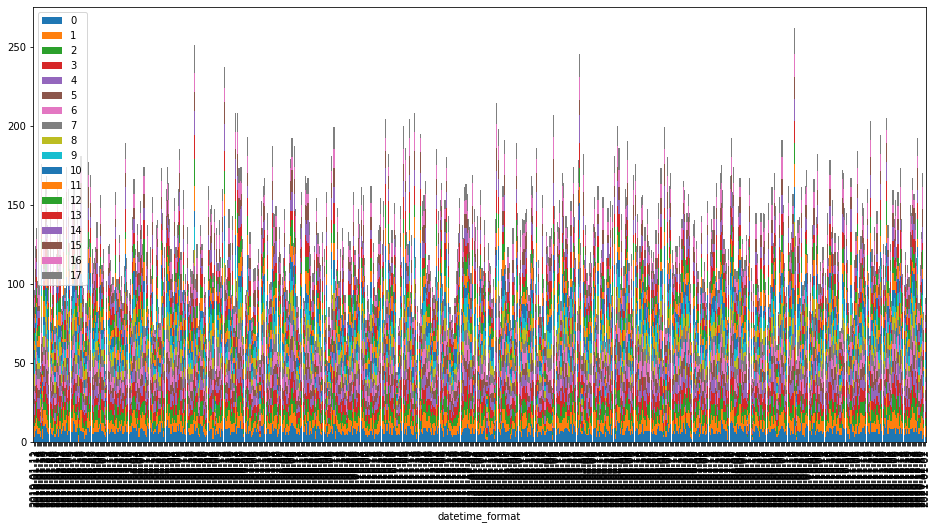

In [8]:
news_df_one_day = news_df_one_text.groupby(
    [news_df_one_text['datetime_format'].dt.date]
).sum()
news_df_one_day.plot(kind='bar', stacked=True, width=0.95, figsize=(16,8))

In [10]:
news_df_one_day['date'] = news_df_one_day.index
news_df_one_day['date'] = news_df_one_day['date'].apply(str)
news_df_one_day

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,date
datetime_format,,,,,,,,,,,,,,,,,,,
2019-01-11,3,7,2,5,7,3,5,3,8,9,6,6,5,3,6,7,6,5,2019-01-11
2019-01-12,7,5,4,10,5,4,10,8,8,8,6,6,7,5,8,8,7,8,2019-01-12
2019-01-13,8,7,10,11,6,7,8,10,5,6,7,3,9,7,10,8,6,7,2019-01-13
2019-01-14,5,5,5,6,7,6,6,6,5,4,5,4,6,4,9,8,6,5,2019-01-14
2019-01-15,5,4,4,8,7,5,7,6,4,3,7,7,6,5,5,3,7,6,2019-01-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-29,7,5,7,5,9,7,6,8,6,6,8,6,5,5,5,4,6,7,2020-12-29
2020-12-30,7,9,6,5,8,7,9,6,5,7,9,8,8,7,8,11,8,5,2020-12-30
2020-12-31,2,13,9,11,8,11,10,8,9,12,10,6,12,5,10,11,14,9,2020-12-31


# Prices

In [11]:
prices_daily = pd.DataFrame(index=[], columns=['Date', 'OPEN', 'CLOSE', 'MIN', 'MAX'])

# prices_daily['date'] = list(pd.date_range(start=d1.date(), end=d2.date()))
# prices_daily['date'] = prices_daily['date'].apply(str)

In [12]:
np.random.randint(-250, 350) / 10000

0.0306

<AxesSubplot:>

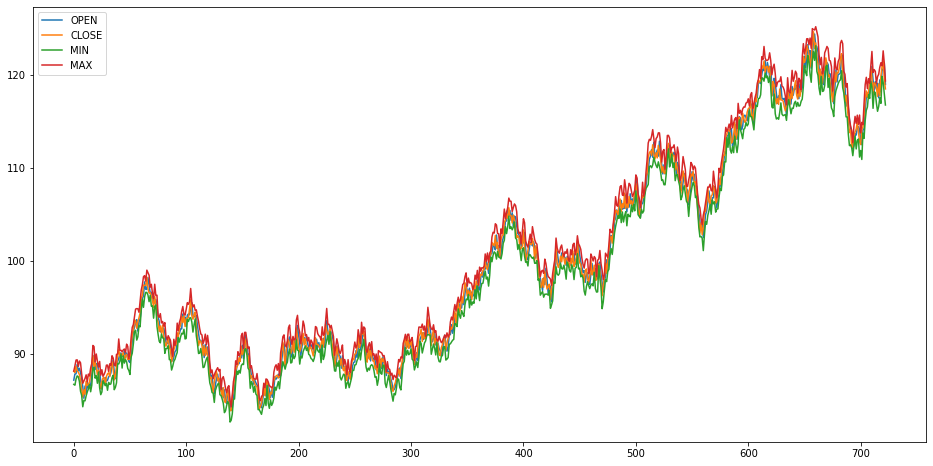

In [13]:
prices_daily = pd.DataFrame(index=[], columns=['Date', 'OPEN', 'CLOSE', 'MIN', 'MAX'])

close_price = 87.5

for i in pd.date_range(start=d1.date(), end=d2.date()):
    
    open_price = close_price * (1 + np.random.randint(-50, 50) / 10000)
        
    close_price = open_price * (1 + np.random.randint(-150, 155) / 10000)
    max_price = max(open_price, close_price) * (1 + np.random.randint(0, 150) / 10000)
    min_price = min(open_price, close_price) * (1 - np.random.randint(0, 150) / 10000)
    
    prices_daily = prices_daily.append(
        {'Date': str(i),
         'OPEN': open_price,
         'CLOSE': close_price,
         'MIN': min_price,
         'MAX': max_price,
        }, 
        ignore_index=True
    )

prices_daily.plot(figsize=(16,8))

In [14]:
prices_daily['Date'] = prices_daily['Date'].apply(
    lambda x: str(datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())
)

# Merge

In [18]:
prices_daily.index = prices_daily['Date']
prices_daily.head(2)

,Date,OPEN,CLOSE,MIN,MAX
Date,,,,,
2019-01-11,2019-01-11,87.141250,88.099804,86.688115,88.117424
2019-01-12,2019-01-12,87.800264,87.967085,86.597401,88.670822


In [19]:
news_df_one_day.index = news_df_one_day['date']
news_df_one_day.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,date
date,,,,,,,,,,,,,,,,,,,
2019-01-11,3,7,2,5,7,3,5,3,8,9,6,6,5,3,6,7,6,5,2019-01-11
2019-01-12,7,5,4,10,5,4,10,8,8,8,6,6,7,5,8,8,7,8,2019-01-12


In [20]:
prices_news_merged_df = pd.concat([prices_daily, news_df_one_day], axis=1)
prices_news_merged_df.head(2)

,Date,OPEN,CLOSE,MIN,MAX,0,1,2,3,4,...,9,10,11,12,13,14,15,16,17,date
2019-01-11,2019-01-11,87.141250,88.099804,86.688115,88.117424,3,7,2,5,7,...,9,6,6,5,3,6,7,6,5,2019-01-11
2019-01-12,2019-01-12,87.800264,87.967085,86.597401,88.670822,7,5,4,10,5,...,8,6,6,7,5,8,8,7,8,2019-01-12


In [484]:
# for period_now in range (1, 6):
#     new_loc_name = 'y_' + str(period_now)
#     prices_news_merged_df[new_loc_name] = prices_news_merged_df['CLOSE'].shift(periods=period_now, fill_value=None)

# prices_news_merged_df.head(6)

,Date,OPEN,CLOSE,MIN,MAX,0,1,2,3,4,...,14,15,16,17,date,y_1,y_2,y_3,y_4,y_5
2019-01-11,2019-01-11,87.430000,87.430000,87.395028,88.356758,5,6,5,6,4,...,7,4,5,5,2019-01-11,NaN,NaN,NaN,NaN,NaN
2019-01-12,2019-01-12,87.499944,86.406195,86.121054,88.348693,4,4,4,6,5,...,5,6,4,6,2019-01-12,87.430000,NaN,NaN,NaN,NaN
2019-01-13,2019-01-13,86.034648,86.757339,84.864577,87.026287,5,4,4,4,5,...,8,5,6,6,2019-01-13,86.406195,87.430000,NaN,NaN,NaN
2019-01-14,2019-01-14,86.687933,87.242736,85.439627,87.626604,9,9,11,7,5,...,10,10,7,8,2019-01-14,86.757339,86.406195,87.430000,NaN,NaN
2019-01-15,2019-01-15,86.902489,86.832967,86.207770,87.823656,6,7,2,7,5,...,6,5,3,7,2019-01-15,87.242736,86.757339,86.406195,87.430000,NaN
2019-01-16,2019-01-16,87.050050,88.233930,86.484224,88.648630,3,5,5,4,3,...,2,5,6,5,2019-01-16,86.832967,87.242736,86.757339,86.406195,87.43


In [21]:
prices_news_merged_df.to_csv('prices_news_merged_df.csv', index=False, sep=';')